In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import SGDClassifier

# 데이터 확인

In [4]:
# 패션 MNIST 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
# load된 훈련데이터 확인
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


- 훈련 데이터는 60000개의 이미지로 이루어져 있음
- 각 이미지의 크기는 28 * 28
- 타깃은 60000개의 원소가 있는 1차원 배열

In [8]:
# 테스트 데이터 확인
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [9]:
np.unique(x_test)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

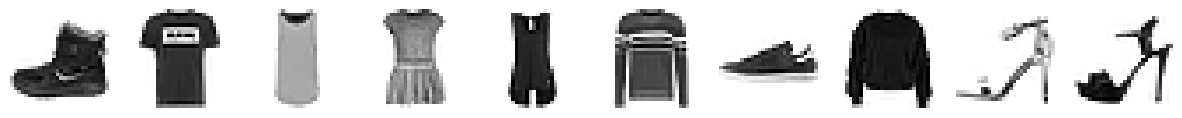

In [10]:
# 샘플 이미지 확인
fig, axs = plt.subplots(1, 10, figsize = (15, 15))

for i in range(10):
    axs[i].imshow(x_train[i], cmap = "gray_r")
    axs[i].axis("off")
    
plt.show()

In [11]:
# 종속변수 확인
print([y_train[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


- 패션 MNIST 레이블의 의미
    - 0 : 티셔츠
    - 1 : 바지
    - 2 : 스웨터
    - 3 : 드레스
    - 4 : 코트
    - 5 : 샌달
    - 6 : 셔츠
    - 7 : 스니커즈
    - 8 : 가방
    - 9 : 앵클 부츠

In [12]:
# 각 레이블 당 샘플 개수 확인
print(np.unique(y_train, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


- 0 ~ 9까지 레이블마다 정확히 6000개의 샘플이 들어 있음

# 로지스틱회귀로 패션 아이템 분류

In [14]:
# SGDClassifier 는 2차원 입력을 다루지 못하기 때문에 데이터를 1차원 배열로 변환
scaled_train = x_train / 255 # 각 픽셀은 0 ~ 255 사이의 정숫값을 가짐
scaled_train = scaled_train.reshape(-1, 28 * 28)

In [15]:
print(scaled_train.shape)

(60000, 784)


In [17]:
sgd = SGDClassifier(loss = "log_loss", max_iter = 5, random_state = 5)
scores = cross_validate(sgd, scaled_train, y_train, n_jobs = -1)
print(np.mean(scores["test_score"]))

0.8172166666666667


# 인공신경망

- 로지스틱 회귀식
    - z_티셔츠 = w1 x 픽셀1 + w2 x 픽셀2 + ...... + w784 x 픽셀784 + b
    - z_바지 = w1' x 픽셀1 + w2' x 픽셀2 + ...... + w784' x 픽셀784 + b'

- 로지스틱 회귀

<img src = "./image/logistic_ann.png">

- 인공신경망

<img src = "./image/neuron-node.png">

- 활성화함수 자리에 로지스틱 회귀의 softmax가 들어가므로 z1 ~ z10까지 10개의 레이블에 대한 확률값을 계산
    - 이 z1 ~ z10 까지의 뉴런을 바탕으로 클래스를 예측하기 때문에 신경망의 최종값을 만든다는 의미에서 출력층(output layer)이라고 부름
    
- 인공신경망에서는 z값을 계산하는 단위를 뉴런(neuron)이라고 불렀음
    - 현재는 뉴런 대신에 유닛(unit)이라는 표현을 사용
    
- x1 ~ x784 까지를 입력층(input layer)라고 부름
    - 입력층은 픽셀값 자체이고 특별한 계산을 수행하지는 않음
    
- 인공신경망은 1943년 워런 매컬러(Warren McCulloch)와 월터 피츠(Walter Pitts)가 제안한 뉴런 모델로부터 시작됨
    - 이를 매컬러-피츠 뉴런 이라고 부름
    - 인공 뉴런은 생물학적 뉴런에서 영감을 얻어 만들어짐

In [18]:
# 위에서 만든 데이터를 그대로 활용하여 검증세트 나누기
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train, y_train,
                                                            test_size = 0.2,
                                                            random_state = 5)

In [19]:
print(scaled_train.shape, y_train.shape)

(48000, 784) (48000,)


In [20]:
print(scaled_val.shape, y_val.shape)

(12000, 784) (12000,)


## 밀집층(dense layer)

- 784개의 픽셀과 10개의 출력층 뉴런이 모두 연결되는 층
- 양쪽의 뉴런이 모두 연결하고 있기 때문에 완전 연결층(fully connected layer, 전결합층)이라고도 부름

In [21]:
# Dense 클래스의 매개변수 = 유닛 개수, 출력에 적용할 활성화 함수, 입력의 크기
dense = keras.layers.Dense(10, activation = "softmax", input_shape = (784,))

- 뉴런 개수 = 10
    - 10개의 레이블이 존재하기 때문
    
- 활성화함수 = softmax
    - 10개의 유닛에서 출력되는 값을 확률값으로 바꾸기 위해서 softmax 사용
    - 만약에 이진분류 문제라면 활성화함수를 시그모이드 함수로 설정하는 것도 가능
        - activation = "sigmoid"
        
- 입력 크기 = (784,)
    - 10개의 뉴런이 각각 몇 개의 입력을 받는지 튜플로 지정
    - 현재 예제에서는 784개의 픽셀값 1차원으로 받기 때문에 (784,)를 입력

In [22]:
# 신경망 모델을 생성
model = keras.Sequential()

In [23]:
# 신경망 모델에 밀집층을 추가
model.add(dense)

In [24]:
# 모델 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# 모델을 학습시키기위한 학습과정을 설정
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")

In [26]:
y_train[:5]

array([3, 0, 2, 3, 1], dtype=uint8)

- loss = "sparse_categorical_crossentropy"
    - sparse_categorical_crossentropy : 다중 분류에서 사용하는 손실 함수
        - 정답의 확률값을 1에 가깝게, 오답의 확률값을 0에 가깝게 만들도록 하는 손실 함수
    - 이진분류에서는 binary_crossentropy를 사용
    
- metrics = "accuracy"
    - 케라스는 모델이 훈련할 때 기본으로 매 에포크마다 손실값을 출력해줌
    - 손실값 외에도 정확도를 함께 출력해주기 위해서 정확도를 나타낼 지표 accuracy를 지정

In [27]:
# 모델 훈련
model.fit(scaled_train, y_train, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6078 - accuracy: 0.7921
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4735 - accuracy: 0.8405
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4505 - accuracy: 0.8478
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4364 - accuracy: 0.8518
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4294 - accuracy: 0.8549


In [29]:
# 검증데이터로 성능 평가
model.evaluate(scaled_val, y_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.4483 - accuracy: 0.8468


[0.4482988715171814, 0.846833348274231]